In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Untitled folder/credit_risk_dataset.csv")

In [3]:
df.shape

(32581, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
correlation = df.corr()

<ipython-input-6-bbce1ddb6927>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [7]:
correlation['loan_status']

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
Name: loan_status, dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [9]:
ex.pie(df,names='loan_status',title='Propotion Of Loan Status')

In [10]:
df.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


<ipython-input-11-f1b1a0d2245d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='loan_int_rate', ylabel='Density'>

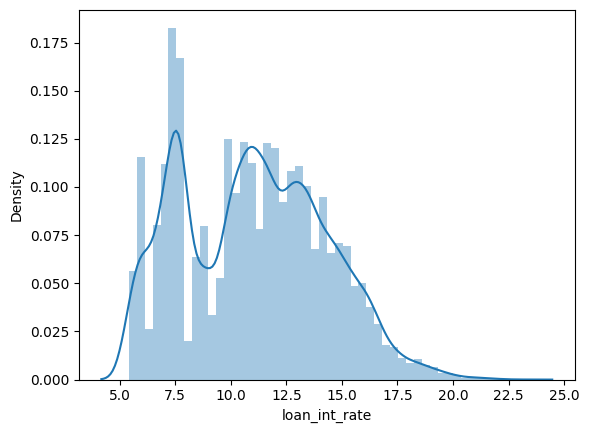

In [11]:
import seaborn as sns
sns.distplot(df['loan_int_rate'])

<Axes: xlabel='loan_int_rate', ylabel='Density'>

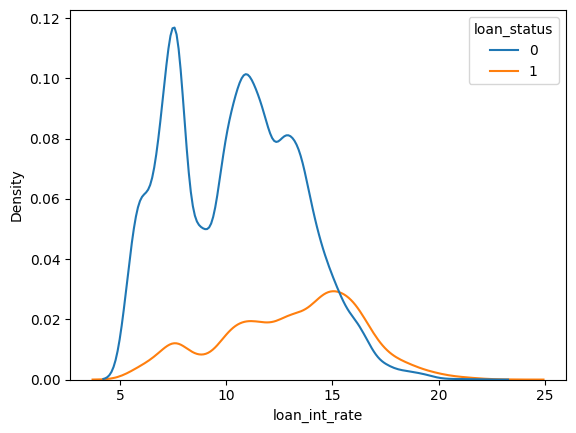

In [12]:
sns.kdeplot(df,x='loan_int_rate',hue='loan_status')

In [13]:
#sns.kdeplot(df['loan_status'])

In [14]:
print(df['loan_status'].value_counts())

0    25473
1     7108
Name: loan_status, dtype: int64


In [15]:
'''df.groupby("loan_status").value_counts()'''

'df.groupby("loan_status").value_counts()'

In [16]:
df.groupby(['loan_status'])[['loan_int_rate']].count()

,loan_int_rate
loan_status,
0,23001
1,6464


In [17]:
df['loan_int_rate'].mode()

0    7.51
Name: loan_int_rate, dtype: float64

In [18]:
df['person_emp_length'].mode()

0    0.0
Name: person_emp_length, dtype: float64

In [19]:
df['loan_int_rate'].fillna(value=7.51,inplace=True)

In [20]:
df['person_emp_length'].fillna(value=0.0, inplace=True)

In [21]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [22]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [23]:
dup = df.duplicated()
dup.value_counts()
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(32416, 12)

In [25]:
from warnings import catch_warnings
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=['int','float']).columns
print(len(cat_col))
print(len(num_col))

4
8


In [26]:
cat_col

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [27]:
for i in cat_col:
  print(i,'_'*2,df[i].nunique())
print(' ')
print('-'*14)
for i in num_col:
  print(i,'-'*2,df[i].nunique())

person_home_ownership __ 4
loan_intent __ 6
loan_grade __ 7
cb_person_default_on_file __ 2
 
--------------
person_age -- 58
person_income -- 4295
person_emp_length -- 36
loan_amnt -- 753
loan_int_rate -- 348
loan_status -- 2
loan_percent_income -- 77
cb_person_cred_hist_length -- 29


In [28]:
mv=df.isna().sum()
mv=pd.DataFrame(mv,columns=['missing_count']).reset_index()
mv.columns=["columns_names","missing_count"]
mv

,columns_names,missing_count
0,person_age,0
1,person_income,0
2,person_home_ownership,0
3,person_emp_length,0
4,loan_intent,0
5,loan_grade,0
6,loan_amnt,0
7,loan_int_rate,0
8,loan_status,0
9,loan_percent_income,0


In [29]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.659427,9593.845632,10.682400,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.162406,6322.730241,3.250768,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,7.510000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [30]:
df.drop(df[df['person_age']>90].index, inplace = True)

In [31]:
df.shape

(32410, 12)

In [32]:
df[df['person_emp_length']>40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


In [33]:
df.loc[df['person_emp_length'] > 40.0, 'person_emp_length'] = 6.0

In [34]:
df[df['person_emp_length']>40]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [35]:
df[df['person_age']==22].mode()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,60000,RENT,6.0,EDUCATION,B,10000,7.51,0,0.1,N,2


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32410.0,27.728325,6.199624,20.00,23.00,26.00,30.00,84.00
person_income,32410.0,65899.247917,52521.229378,4000.00,38514.00,55000.00,79200.00,2039784.00
person_emp_length,32410.0,4.651064,4.052339,0.00,2.00,4.00,7.00,38.00
loan_amnt,32410.0,9593.687134,6322.603912,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32410.0,10.682421,3.250907,5.42,7.51,10.62,13.11,23.22
loan_status,32410.0,0.218729,0.413391,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32410.0,0.170256,0.106808,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32410.0,5.810398,4.056171,2.00,3.00,4.00,8.00,30.00


<ipython-input-37-199d4b88be5d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='cb_person_cred_hist_length', ylabel='Density'>

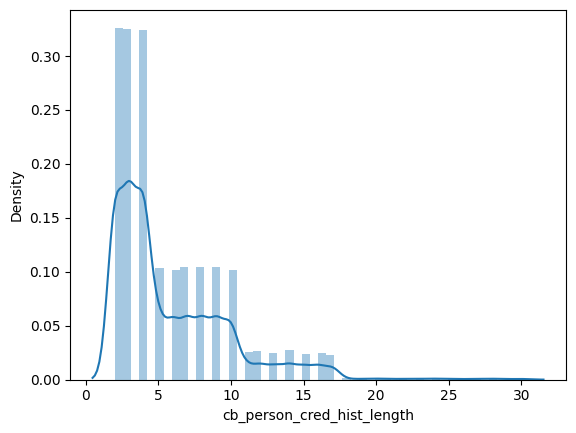

In [37]:
sns.distplot(df['cb_person_cred_hist_length'])

In [38]:
df[df['cb_person_cred_hist_length']>18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32298,58,900000,RENT,18.0,DEBTCONSOLIDATION,C,19600,13.98,0,0.02,N,28
32299,65,76000,RENT,3.0,EDUCATION,B,35000,10.99,1,0.46,N,27
32300,51,667680,MORTGAGE,19.0,PERSONAL,C,10000,13.98,0,0.01,Y,22
32301,53,85000,RENT,19.0,PERSONAL,D,35000,15.65,1,0.41,N,19
32302,58,108350,RENT,5.0,PERSONAL,D,35000,14.91,1,0.32,N,19
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [39]:
df1 = pd.get_dummies(df,columns=cat_col)

In [40]:
df1.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

In [41]:
len(df.columns)

12

In [42]:
len(df1.columns)

27

In [43]:
for i in cat_col:
  print(i,'_'*2,df[i].nunique())
print(' ')
print('-'*14)
for i in num_col:
  print(i,'-'*2,df[i].nunique())

person_home_ownership __ 4
loan_intent __ 6
loan_grade __ 7
cb_person_default_on_file __ 2
 
--------------
person_age -- 55
person_income -- 4294
person_emp_length -- 34
loan_amnt -- 753
loan_int_rate -- 348
loan_status -- 2
loan_percent_income -- 77
cb_person_cred_hist_length -- 29


In [44]:
df1.isna().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

##### Data cleaning process has Completed
# Now Model Building

In [45]:
x ,y = df1.drop('loan_status', axis = 1), df1['loan_status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2,stratify=y)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [47]:
lr = LogisticRegression()
lr.fit(train_x, train_y)
#

LogisticRegression()

In [48]:
y_pred = lr.predict(test_x)

In [49]:
pd.DataFrame({'Real':test_y,'Predict':y_pred})

,Real,Predict
9025,0,0
4113,0,0
185,0,0
16686,0,0
28436,0,0
...,...,...
10121,0,0
32326,0,0
28043,0,0
25406,0,0


In [50]:
print(f'accurarcy Score: {accuracy_score(test_y, y_pred)}\nprecision Score: {precision_score(test_y, y_pred)}\nRecall Score: {recall_score(test_y, y_pred)}\nF1 Score: {f1_score(test_y, y_pred)}')

accurarcy Score: 0.8088552915766739
precision Score: 0.7655786350148368
Recall Score: 0.18194640338504936
F1 Score: 0.294017094017094


#Random Forest classificaition

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [53]:
y_pred_rfc = rfc.predict(test_x)

In [54]:
pd.DataFrame({"Real":test_y,"Predict":y_pred_rfc})

,Real,Predict
9025,0,0
4113,0,0
185,0,0
16686,0,0
28436,0,0
...,...,...
10121,0,0
32326,0,0
28043,0,0
25406,0,0


In [55]:
print(f'accurarcy Score: {accuracy_score(test_y, y_pred_rfc)}\nprecision Score: {precision_score(test_y, y_pred_rfc)}\nRecall Score: {recall_score(test_y, y_pred_rfc)}\nF1 Score: {f1_score(test_y, y_pred_rfc)}')

accurarcy Score: 0.9395248380129589
precision Score: 0.975
Recall Score: 0.7425952045133991
F1 Score: 0.8430744595676541


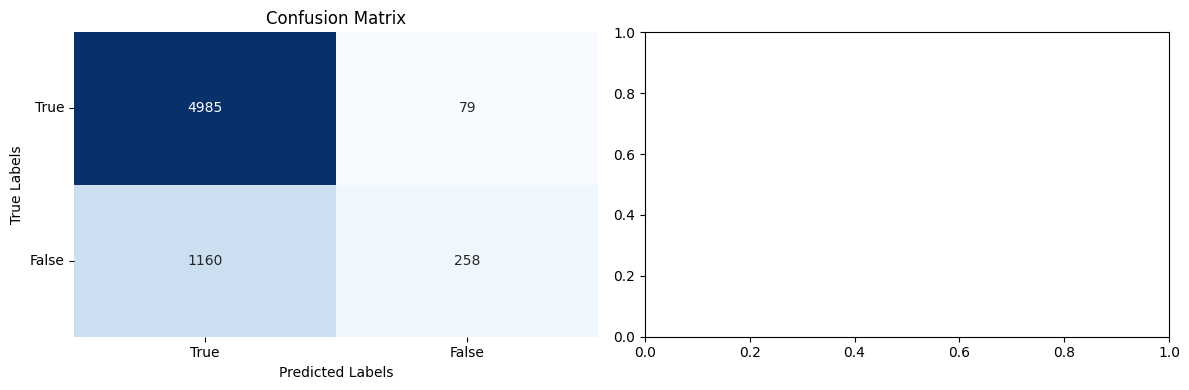

In [56]:
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Calculate the confusion matrix for Logistic Regression
confusion_matrix = confusion_matrix(test_y, lr.predict(test_x))


# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_xticklabels(['True', 'False'])
axes[0].set_yticklabels(['True', 'False'], rotation=0)

plt.tight_layout()
plt.show()